In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression as LR
import numpy as np

In [2]:
df = pd.read_csv("data/hwi_to_dispersal.csv")

In [3]:
# We keep only non-migratory birds.
rdf = df[df["migration"] == "R"].copy()

<AxesSubplot:xlabel='HWI', ylabel='NDam'>

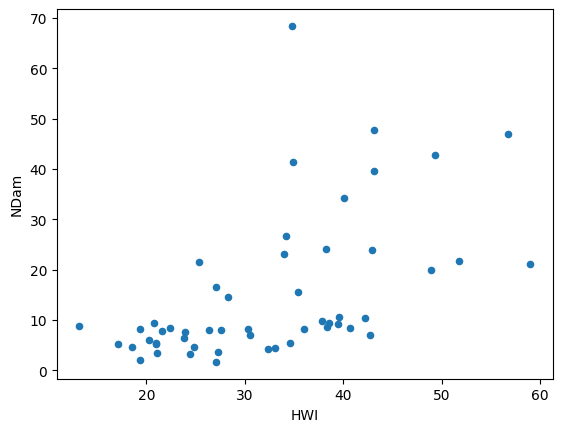

In [4]:
# NDam is the dispersal distance.
# HWI is the hand-wing index. 
rdf.plot.scatter("HWI", "NDam")

In [17]:
# We fit a general linear regression model. 
model = LR()
x = np.array(rdf["HWI"]).reshape(-1, 1)
y = np.array(rdf["NDam"]).reshape(-1, 1)
model.fit(x, y)
model.score(x, y)

0.2946199760743645

In [6]:
# We fit a model with intercept at 0 (proportional).
prop_model = LR(fit_intercept=False)
prop_model.fit(x, y)
prop_model.score(x, y)

0.25827639348038844

<AxesSubplot:xlabel='HWI', ylabel='Predicted Linear'>

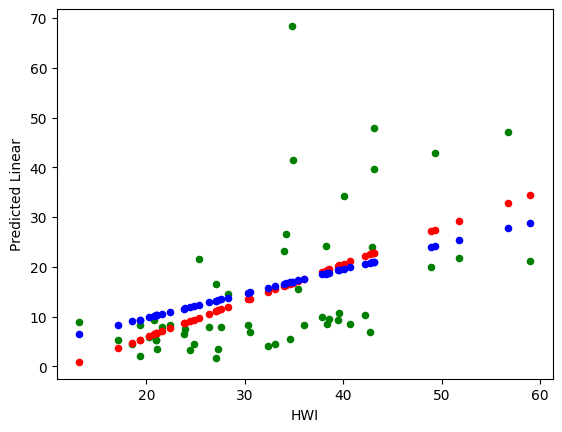

In [7]:
# Let's look at the predictons. 
rdf["Predicted"] = model.predict(x)
rdf["Predicted Linear"] = prop_model.predict(x)
ax0 = rdf.plot("HWI", "NDam", kind="scatter", color="g")
ax1 = rdf.plot("HWI", "Predicted", kind="scatter", color="r", ax=ax0)
rdf.plot("HWI", "Predicted Linear", kind="scatter", ax=ax1, color="b")

In [8]:
# Let's build a dataframe for our birds.
birds = pd.DataFrame({
    "Bird": ["Acorn Woodpecker", "Steller's Jay", "Oak Titmouse"],
    "HWI": [28, 13.7, 14.4],
})

In [9]:
# Let's add the predictions.
xx = np.array(birds["HWI"]).reshape(-1, 1)
birds["Prediction Intercept"] = model.predict(xx)
birds["Prediction Proportional"] = prop_model.predict(xx)
birds

,Bird,HWI,Prediction Intercept,Prediction Proportional
0,Acorn Woodpecker,28.0,11.780075,13.686244
1,Steller's Jay,13.7,1.281536,6.696484
2,Oak Titmouse,14.4,1.795450,7.038640


In [19]:
model.coef_, model.intercept_

(array([[0.73416355]]), array([-8.77650471]))

## Model with all input

How much better would be a model with all input?

In [10]:
# x = np.array(rdf[["mass", "wingspan", "wing.area", "AR"]])
x = np.array(rdf[["mass", "wingspan"]])
y = np.array(rdf["NDam"]).reshape(-1, 1)
full_model = LR()
full_model.fit(x, y)
full_model.score(x, y)

0.5123859408294227

In [11]:
rdf["Full Prediction"] = full_model.predict(x)

<AxesSubplot:xlabel='NDam', ylabel='Full Prediction'>

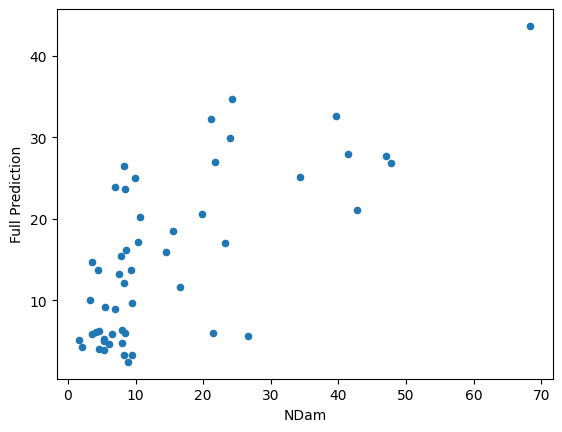

In [12]:
rdf.plot.scatter("NDam", "Full Prediction")

This model has a coefficient of explanation that is much superior.  Let's look what it gives for our birds. 

In [13]:
birds = pd.DataFrame({
    "Bird": ["Acorn Woodpecker", "Steller's Jay", "Oak Titmouse"],
    "HWI": [28, 13.7, 14.4],
    "mass": [0.08, 0.12, 0.016],
    "wingspan": [0.39, 0.44, 0.19],
})

In [14]:
birds["Predicted Dispersal"] = full_model.predict(np.array(birds[["mass", "wingspan"]]))

In [15]:
birds

,Bird,HWI,mass,wingspan,Predicted Dispersal
0,Acorn Woodpecker,28.0,0.080,0.39,9.838764
1,Steller's Jay,13.7,0.120,0.44,11.271823
2,Oak Titmouse,14.4,0.016,0.19,3.577741
